In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Features

In [2]:
####### About data
# TV promotion budget (in million)
# Social Media promotion budget (in million)
# Radio promotion budget (in million)
# Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
# Sales (in million)


In [3]:
# Import Libraries
import pandas as pd
#----------------------------------------------------
#reading data
data = pd.read_csv('SocialMedia_Sales_Prediction.csv')

data.describe()



,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [4]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [6]:
def count_unique_values(data):
    
    total = data.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))
count_unique_values(data)

,TV,Radio,Social Media,Influencer,Sales
Total,4562,4568,4566,4572,4566
Uniques,91,4568,4566,4,4566


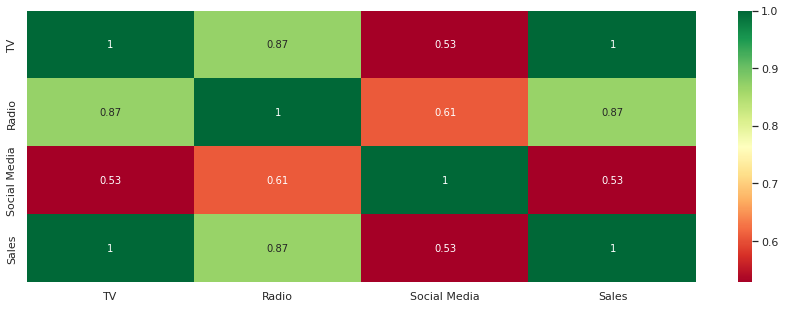

In [7]:

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

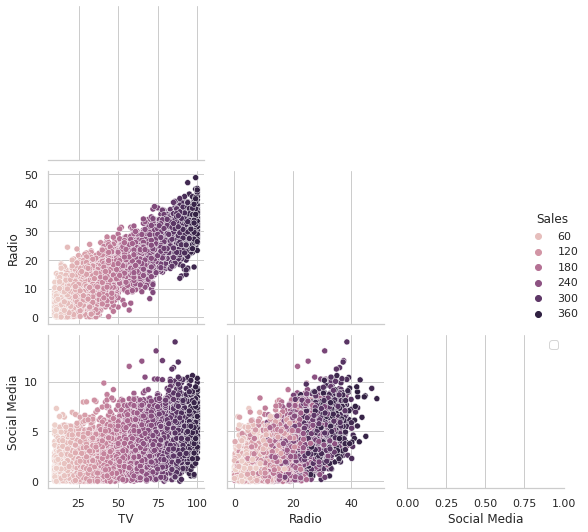

In [8]:
sns.pairplot(data, hue= "Sales" , corner=True)
plt.legend("Sales")
plt.tight_layout()
plt.show()

In [9]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#### Restart the kernel 

In [10]:


from pandas_profiling import ProfileReport

### To Create the Simple report quickly ### change title=
report = data.profile_report(
    sort=None,title="SocialMedia_Sales_Prediction", html={"style": {"full_width": True}}, progress_bar=False
)
report



In [11]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

#Finding Categorical Featurs
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'category' ]
print(categorical_features )

#convert all cols to numbers
cols= categorical_features  
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

['Influencer']


In [12]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TV,10,0.002187
Social Media,6,0.001312
Sales,6,0.001312
Radio,4,0.000875
Influencer,0,0.000000


In [13]:
### Fill numeric rows with the median
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            data[label] = content.fillna(content.median())

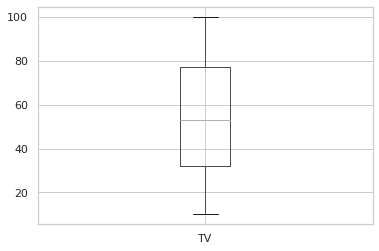

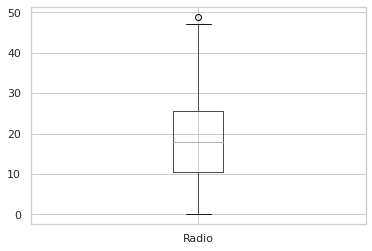

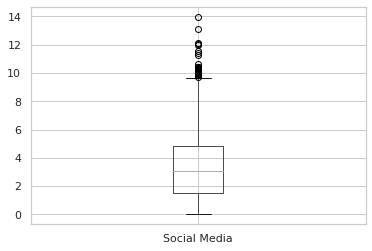

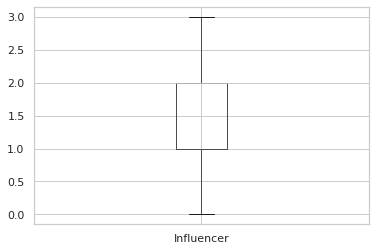

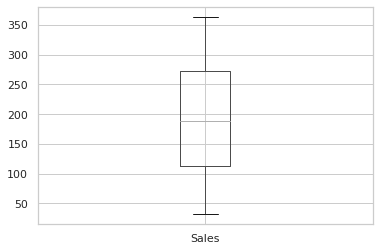

In [14]:

for column in data._get_numeric_data():
    plt.figure()
    data.boxplot([column])

In [15]:
from scipy import stats

def ZRscore_outlier (data):
    out=[]
    med = np.median(data) 
    ma = stats.median_absolute_deviation(data)
    for i in data: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
###Call The Function
ZRscore_outlier(data["Social Media"])

Outliers: [13.98166208]


In [16]:
from scipy import stats

def ZRscore_outlier (data):
    out=[]
    med = np.median(data) 
    ma = stats.median_absolute_deviation(data)
    for i in data: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
###Call The Function
ZRscore_outlier(data["Sales"])

Outliers: []


In [17]:
#X Data
X = data.drop(['Sales'], axis=1, inplace=False)
print('X Data is \n' , X.head())
print('X shape is ' , X.shape)

#y Data
y = data['Sales']
print('y Data is \n' , y.head())
print('y shape is ' , y.shape)

X Data is 
      TV      Radio  Social Media  Influencer
0  16.0   6.566231      2.907983           1
1  13.0   9.237765      2.409567           1
2  41.0  15.886446      2.913410           1
3  83.0  30.020028      6.922304           1
4  15.0   8.437408      1.405998           2
X shape is  (4572, 4)
y Data is 
 0     54.732757
1     46.677897
2    150.177829
3    298.246340
4     56.594181
Name: Sales, dtype: float64
y shape is  (4572,)


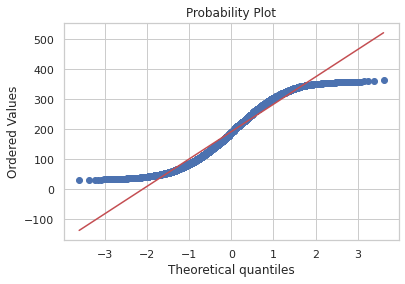

In [18]:
from scipy import stats
stats.probplot(data["Sales"], plot = plt);

####  الحل Transformation(اذا كانت غير موزعة  )
# data["Sale_Price"] = np.log(data["Sale_Price"])

In [19]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#----------------------------------------------------

#----------------------------------------------------
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
#print('X \n' , X[:10])
#print('y \n' , y[:10])

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

{'LinearRegression': 0.9925360395605325, 'SGDRegressor ': 0.9925365588107153, 'Lasso ': 0.9924771809066132, 'Ridge ': 0.9925378928635639, 'Random Forest ': 0.9919577084096608, 'Gradient Boosting ': 0.9917106087535595, 'SVR ': 0.9672373214759374, 'DecisionTree': 0.9785825408457374, 'KNN': 0.984310129510351}


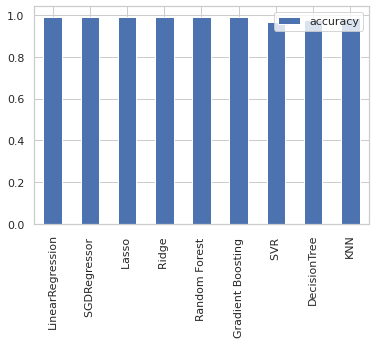

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# Put models in a dictionary
models = {"LinearRegression": LinearRegression(),
          "SGDRegressor " : SGDRegressor(), 
          "Lasso "        : Lasso(),
          "Ridge "        :  Ridge(),
          "Random Forest ": RandomForestRegressor(),
          "Gradient Boosting ": GradientBoostingRegressor(),
          "SVR "          : SVR(),
          "DecisionTree"  :DecisionTreeRegressor(),
          "KNN"           :KNeighborsRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(44)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
print(np.array(model_scores))

#Model Comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();


In [21]:
#Import Libraries
from sklearn.linear_model import LinearRegression
#----------------------------------------------------

#----------------------------------------------------
#Applying Linear Regression Model 

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
#print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.9937029660888255
Linear Regression Test Score is :  0.9925360395605325
Linear Regression Coef is :  [91.74756932  1.16692069  0.1490414   0.16021421]
Linear Regression intercept is :  192.5470709996893


In [27]:
print("The Real Value Is    :",np.trunc(y_test[:10]))
print("The Predicted Value Is :" ,np.trunc(y_pred[:10]))

The Real Value Is    : 185     331.0
2896    109.0
1402    210.0
2440    321.0
3692    327.0
2321     71.0
2830    101.0
593     202.0
1831    214.0
1552    166.0
Name: Sales, dtype: float64
The Predicted Value Is : [334. 106. 209. 320. 327.  70. 104. 196. 211. 168.]


In [22]:
#Import Libraries
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
#----------------------------------------------------

#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  2.891340822127923
Mean Squared Error Value is :  62.56153833376705
Median Absolute Error Value is :  2.038608591437793


In [23]:
#Import Libraries
from sklearn.model_selection import cross_val_score
#----------------------------------------------------

#----------------------------------------------------
#Applying Cross Validate Score :  
'''
model_selection.cross_val_score(estimator,X,y=None,groups=None,scoring=None,cv=’warn’,n_jobs=None,verbose=0,
                                fit_params=None,pre_dispatch=‘2*n_jobs’,error_score=’raise-deprecating’)
'''

#  don't forget to define the model first !!!
CrossValidateScoreTrain = cross_val_score(LinearRegressionModel, X_train, y_train, cv=3)
CrossValidateScoreTest = cross_val_score(LinearRegressionModel, X_test, y_test, cv=3)

# Showing Results
print('Cross Validate Score for Training Set: \n', CrossValidateScoreTrain)
print('Cross Validate Score for Testing Set: \n', CrossValidateScoreTest)

Cross Validate Score for Training Set: 
 [0.99579521 0.99885033 0.98644927]
Cross Validate Score for Testing Set: 
 [0.99102446 0.99370962 0.99256023]


In [29]:
import pickle
# Save an extisting model to file
pickle.dump(LinearRegressionModel, open("LinearRegressionModel.pkl", "wb"))
# Load a saved model
loaded_pickle_model = pickle.load(open("LinearRegressionModel.pkl", "rb"))
print(loaded_pickle_model.score(X_test,y_test))

0.9925360395605325
